In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
from datetime import datetime

In [2]:
quandl.ApiConfig.api_key = 'Xn3Ek7v1jDyTcyKzNxrk'

data = quandl.get_table('ZILLOW/DATA', region_id='96492')
data.head()

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,96492,2020-09-30,703497.0
1,ZSFH,96492,2020-08-31,695626.0
2,ZSFH,96492,2020-07-31,689201.0
3,ZSFH,96492,2020-06-30,687058.0
4,ZSFH,96492,2020-05-31,685320.0


In [7]:
regions = quandl.get_table('ZILLOW/REGIONS')
regions.head()

/Users/franklinshih/anaconda3/envs/pyfinance/lib/python3.8/site-packages/quandl/get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


,region_id,region_type,region
None,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo


In [8]:
regions[regions['region'].apply(lambda x: '91765' in x)]

,region_id,region_type,region
None,,,
2494,96505,zip,91765


In [9]:
west_diamondbar = regions[regions['region_id'] == "96522"]
east_diamondbar = regions[regions['region_id'] == "96505"]

In [7]:
regions.iloc[2482]

region_id      96522
region_type      zip
region         91789
Name: 2482, dtype: object

In [8]:
east_diamondbar

,region_id,region_type,region
None,,,
2494,96505,zip,91765


In [9]:
west_diamondbar

,region_id,region_type,region
None,,,
2482,96522,zip,91789


In [3]:
quandl.ApiConfig.api_key = 'Xn3Ek7v1jDyTcyKzNxrk'

data = quandl.get_table('ZILLOW/DATA', region_id='96505')
data.head()


,indicator_id,region_id,date,value
None,,,,
0,ZSFH,96505,2020-09-30,755068.0
1,ZSFH,96505,2020-08-31,747504.0
2,ZSFH,96505,2020-07-31,741035.0
3,ZSFH,96505,2020-06-30,756829.0
4,ZSFH,96505,2020-05-31,754624.0


In [4]:
indicator = quandl.get_table('ZILLOW/INDICATORS')
indicator.head()

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [5]:
data_indic = pd.merge(data,indicator,on='indicator_id')
data_indic.head()

,indicator_id,region_id,date,value,indicator,category
0,ZSFH,96505,2020-09-30,755068.0,ZHVI Single-Family Homes Time Series ($),Home values
1,ZSFH,96505,2020-08-31,747504.0,ZHVI Single-Family Homes Time Series ($),Home values
2,ZSFH,96505,2020-07-31,741035.0,ZHVI Single-Family Homes Time Series ($),Home values
3,ZSFH,96505,2020-06-30,756829.0,ZHVI Single-Family Homes Time Series ($),Home values
4,ZSFH,96505,2020-05-31,754624.0,ZHVI Single-Family Homes Time Series ($),Home values


In [10]:
final = pd.merge(regions,data_indic,on='region_id')
final = final[final['category'] == 'Home values']

final.index = pd.to_datetime(final['date'])
final.head()

,region_id,region_type,region,indicator_id,date,value,indicator,category
date,,,,,,,,
2020-09-30,96505,zip,91765,ZSFH,2020-09-30,755068.0,ZHVI Single-Family Homes Time Series ($),Home values
2020-08-31,96505,zip,91765,ZSFH,2020-08-31,747504.0,ZHVI Single-Family Homes Time Series ($),Home values
2020-07-31,96505,zip,91765,ZSFH,2020-07-31,741035.0,ZHVI Single-Family Homes Time Series ($),Home values
2020-06-30,96505,zip,91765,ZSFH,2020-06-30,756829.0,ZHVI Single-Family Homes Time Series ($),Home values
2020-05-31,96505,zip,91765,ZSFH,2020-05-31,754624.0,ZHVI Single-Family Homes Time Series ($),Home values


<AxesSubplot:xlabel='date'>

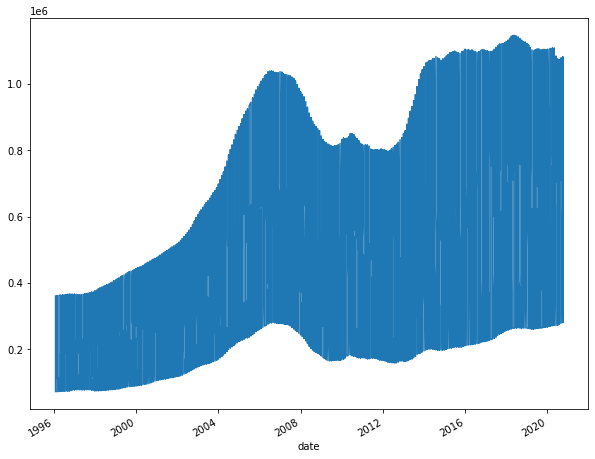

In [29]:
final['value'].plot(figsize=(10,8))

In [14]:
final.groupby(final['date'].dt.month)['value'].transform('mean')

0       445425.440
1       443739.640
2       442109.390
3       440679.815
4       439092.795
           ...    
2371    439092.795
2372    437818.265
2373    436381.600
2374    434938.030
2375    433498.120
Name: value, Length: 2376, dtype: float64

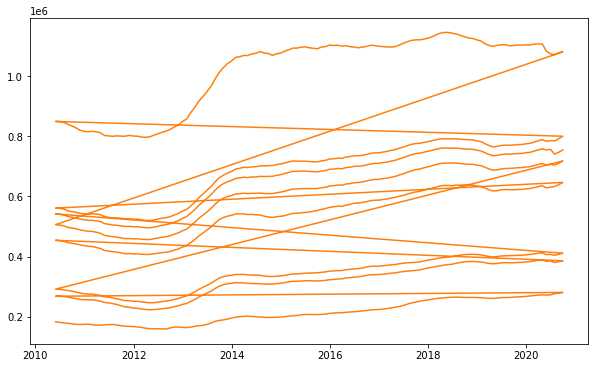

In [30]:
temp = final[(final['date'] > '2010-5-1') & (final['date'] <= '2020-9-30')]
# temp['date'] = pd.to_datetime(temp['date'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(temp['value'], color='tab:orange')

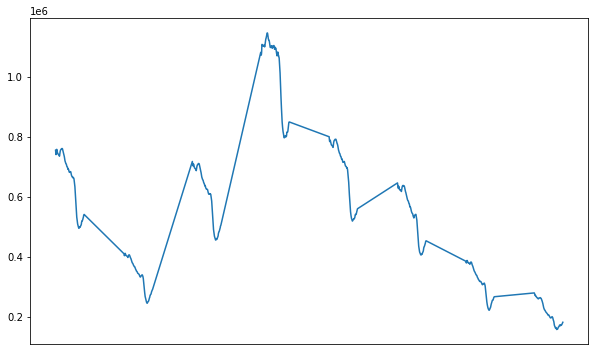

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(temp['date'])
ax.plot(temp['value'])

In [17]:
group = temp.groupby(['indicator'])
group.describe()

value               \
                                                   count         mean   
indicator                                                               
ZHVI 1-Bedroom Time Series ($)                     125.0   213733.048   
ZHVI 2-Bedroom Time Series ($)                     125.0   315461.064   
ZHVI 3-Bedroom Time Series ($)                     125.0   540326.464   
ZHVI 4-Bedroom Time Series ($)                     125.0   684091.784   
ZHVI 5+ Bedroom Time Series ($)                    125.0  1015251.080   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)  125.0   606182.584   
ZHVI Condo/Co-op Time Series ($)                   125.0   340212.624   
ZHVI Single-Family Homes Time Series ($)           125.0   654176.232   

                                                                            \
                                                             std       min   
indicator                                                                    
ZHVI 1-Bedroom Time Series ($)                      38693.937615  159153.0   
ZHVI 2-Bedroom Time Series ($)                      53355.251333  222976.0   
ZHVI 3-Bedroom Time Series ($)                      81504.449468  407186.0   
ZHVI 4-Bedroom Time Series ($)                      99114.266888  519728.0   
ZHVI 5+ Bedroom Time Series ($)                    126741.175350  796848.0   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   90159.348003  456767.0   
ZHVI Condo/Co-op Time Series ($)                    54295.277155  246378.0   
ZHVI Single-Family Homes Time Series ($)            94889.156675  495738.0   

                                                                        \
                                                        25%        50%   
indicator                                                                
ZHVI 1-Bedroom Time Series ($)                     174772.0   207278.0   
ZHVI 2-Bedroom Time Series ($)                     265032.0   319244.0   
ZHVI 3-Bedroom Time Series ($)                     450962.0   548190.0   
ZHVI 4-Bedroom Time Series ($)                     560299.0   717564.0   
ZHVI 5+ Bedroom Time Series ($)                    849714.0  1088028.0   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)  502493.0   626176.0   
ZHVI Condo/Co-op Time Series ($)                   287072.0   345173.0   
ZHVI Single-Family Homes Time Series ($)           540753.0   683864.0   

                                                                         
                                                         75%        max  
indicator                                                                
ZHVI 1-Bedroom Time Series ($)                      260173.0   280779.0  
ZHVI 2-Bedroom Time Series ($)                      366818.0   388799.0  
ZHVI 3-Bedroom Time Series ($)                      622320.0   646851.0  
ZHVI 4-Bedroom Time Series ($)                      771224.0   800510.0  
ZHVI 5+ Bedroom Time Series ($)                    1103524.0  1145836.0  
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   691605.0   718242.0  
ZHVI Condo/Co-op Time Series ($)                    392953.0   412583.0  
ZHVI Single-Family Homes Time Series ($)            741061.0   761247.0

In [18]:
group.describe()

value               \
                                                   count         mean   
indicator                                                               
ZHVI 1-Bedroom Time Series ($)                     125.0   213733.048   
ZHVI 2-Bedroom Time Series ($)                     125.0   315461.064   
ZHVI 3-Bedroom Time Series ($)                     125.0   540326.464   
ZHVI 4-Bedroom Time Series ($)                     125.0   684091.784   
ZHVI 5+ Bedroom Time Series ($)                    125.0  1015251.080   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)  125.0   606182.584   
ZHVI Condo/Co-op Time Series ($)                   125.0   340212.624   
ZHVI Single-Family Homes Time Series ($)           125.0   654176.232   

                                                                            \
                                                             std       min   
indicator                                                                    
ZHVI 1-Bedroom Time Series ($)                      38693.937615  159153.0   
ZHVI 2-Bedroom Time Series ($)                      53355.251333  222976.0   
ZHVI 3-Bedroom Time Series ($)                      81504.449468  407186.0   
ZHVI 4-Bedroom Time Series ($)                      99114.266888  519728.0   
ZHVI 5+ Bedroom Time Series ($)                    126741.175350  796848.0   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   90159.348003  456767.0   
ZHVI Condo/Co-op Time Series ($)                    54295.277155  246378.0   
ZHVI Single-Family Homes Time Series ($)            94889.156675  495738.0   

                                                                        \
                                                        25%        50%   
indicator                                                                
ZHVI 1-Bedroom Time Series ($)                     174772.0   207278.0   
ZHVI 2-Bedroom Time Series ($)                     265032.0   319244.0   
ZHVI 3-Bedroom Time Series ($)                     450962.0   548190.0   
ZHVI 4-Bedroom Time Series ($)                     560299.0   717564.0   
ZHVI 5+ Bedroom Time Series ($)                    849714.0  1088028.0   
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)  502493.0   626176.0   
ZHVI Condo/Co-op Time Series ($)                   287072.0   345173.0   
ZHVI Single-Family Homes Time Series ($)           540753.0   683864.0   

                                                                         
                                                         75%        max  
indicator                                                                
ZHVI 1-Bedroom Time Series ($)                      260173.0   280779.0  
ZHVI 2-Bedroom Time Series ($)                      366818.0   388799.0  
ZHVI 3-Bedroom Time Series ($)                      622320.0   646851.0  
ZHVI 4-Bedroom Time Series ($)                      771224.0   800510.0  
ZHVI 5+ Bedroom Time Series ($)                    1103524.0  1145836.0  
ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   691605.0   718242.0  
ZHVI Condo/Co-op Time Series ($)                    392953.0   412583.0  
ZHVI Single-Family Homes Time Series ($)            741061.0   761247.0

In [98]:
for idx,grp in temp.groupby(['indicator']):
    print(grp)

     region_id region_type region indicator_id       date     value  \
2079     96505         zip  91765         Z1BR 2020-09-30  280779.0   
2080     96505         zip  91765         Z1BR 2020-08-31  278730.0   
2081     96505         zip  91765         Z1BR 2020-07-31  276643.0   
2082     96505         zip  91765         Z1BR 2020-06-30  272810.0   
2083     96505         zip  91765         Z1BR 2020-05-31  271788.0   

                           indicator     category  
2079  ZHVI 1-Bedroom Time Series ($)  Home values  
2080  ZHVI 1-Bedroom Time Series ($)  Home values  
2081  ZHVI 1-Bedroom Time Series ($)  Home values  
2082  ZHVI 1-Bedroom Time Series ($)  Home values  
2083  ZHVI 1-Bedroom Time Series ($)  Home values  
     region_id region_type region indicator_id       date     value  \
1782     96505         zip  91765         Z2BR 2020-09-30  386133.0   
1783     96505         zip  91765         Z2BR 2020-08-31  383055.0   
1784     96505         zip  91765         Z2BR 2

In [ ]:
all_names_index = temp.set_index(['Sex','Name','Year']).sort_index()